Importações para o proojeto

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np

Trazendo dados do arquivo

In [21]:
df = pd.read_csv('dados_vendas.csv')
df

,Date,Product,Category,Quantity,Price
0,2024-03-01,Smartphone,Mobile,10.0,599.99
1,2024-03-01,Laptop,Computers,5.0,999.99
2,2024-03-01,Tablet,Mobile,8.0,299.99
3,2024-03-01,Headphones,Accessories,15.0,49.99
4,2024-03-01,Smartwatch,Wearable,7.0,199.99
...,...,...,...,...,...
232,2024-03-31,Camera,Photography,3.0,399.99
233,2024-03-31,Monitor,Computers,4.0,199.99
234,2024-03-31,Keyboard,Accessories,10.0,29.99
235,2024-03-31,Mouse,Accessories,12.0,19.99


Limpando dados

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      222 non-null    object 
 1   Product   221 non-null    object 
 2   Category  221 non-null    object 
 3   Quantity  221 non-null    float64
 4   Price     221 non-null    float64
dtypes: float64(2), object(3)
memory usage: 9.4+ KB


In [23]:
#Contabilizando dados nulos
df.isnull().sum()

Date        15
Product     16
Category    16
Quantity    16
Price       16
dtype: int64

In [24]:
# Retirando dados nulos
df_limpo = df.dropna()
# Retirando dados duplicados
df_limpo = df_limpo.drop_duplicates()
df_limpo.isnull().sum()

Date        0
Product     0
Category    0
Quantity    0
Price       0
dtype: int64

In [25]:
#Nova tabela com dados tratados
df_limpo

,Date,Product,Category,Quantity,Price
0,2024-03-01,Smartphone,Mobile,10.0,599.99
1,2024-03-01,Laptop,Computers,5.0,999.99
2,2024-03-01,Tablet,Mobile,8.0,299.99
3,2024-03-01,Headphones,Accessories,15.0,49.99
4,2024-03-01,Smartwatch,Wearable,7.0,199.99
...,...,...,...,...,...
232,2024-03-31,Camera,Photography,3.0,399.99
233,2024-03-31,Monitor,Computers,4.0,199.99
234,2024-03-31,Keyboard,Accessories,10.0,29.99
235,2024-03-31,Mouse,Accessories,12.0,19.99


In [26]:
#Comparando as tabelas
df.shape

(237, 5)

In [27]:
df_limpo.shape

(220, 5)

In [28]:
# Converte a coluna 'Quantity' para o tipo inteiro
df_limpo['Quantity'] = df_limpo['Quantity'].astype(int)


In [29]:
# Convertando a coluna Date para tipo data
df_limpo['Date'] = pd.to_datetime(df_limpo['Date'])

In [30]:
# Salvando dados tratados em um no csv
df_limpo.to_csv('vendas_dados_limpo.csv', index = False)
print('Dados salvos com sucesso')

Dados salvos com sucesso


In [31]:
#Contabilizando dados nulos da nova taabela
df_limpo.isnull().sum()

Date        0
Product     0
Category    0
Quantity    0
Price       0
dtype: int64

In [32]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 0 to 236
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      220 non-null    datetime64[ns]
 1   Product   220 non-null    object        
 2   Category  220 non-null    object        
 3   Quantity  220 non-null    int32         
 4   Price     220 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int32(1), object(2)
memory usage: 9.5+ KB


Receita total por categoria de produto

In [33]:
total_vendas_por_categoria = df_limpo.groupby('Category')['Price'].sum().sort_values(ascending=False)
total_vendas_por_categoria

Category
Computers      26399.56
Mobile         19799.56
Photography     8799.78
Wearable        4399.78
Office          3299.78
Accessories     2199.34
Name: Price, dtype: float64

Produto mais vendido e menos vendido

In [34]:
# Somando a quantidade de produtos vendidos
quantidades_vendas = df_limpo.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
quantidades_vendas

Product
Headphones    321
Mouse         255
Keyboard      211
Smartphone    211
Tablet        176
Smartwatch    145
Laptop        119
Monitor        97
Camera         57
Printer        35
Name: Quantity, dtype: int32

In [35]:
#Trazendo produto e quantos foram vendidos
produto_mais_vendido = quantidades_vendas.idxmax()
quantidade_mais_vendida = quantidades_vendas.max()
print(f'O produto mais vendido foi: {produto_mais_vendido} com {int(quantidade_mais_vendida)} de itens vendidos!')

O produto mais vendido foi: Headphones com 321 de itens vendidos!


In [36]:
#Trazendo produto e quantos foram vendidos
produto_menos_vendido = quantidades_vendas.idxmin()
quantidade_menos_vendida = quantidades_vendas.min()
print(f'O produto menos vendido foi: {produto_menos_vendido} com {int(quantidade_menos_vendida)} de itens vendidos!')

O produto menos vendido foi: Printer com 35 de itens vendidos!


Analisando a variação de vendas ao longo do tempo (por mês e trimestre).


In [39]:
#Concatenando arquivos csv para gerar um novo DataFrame
caminho = r'C:\Users\55859\OneDrive\Área de Trabalho\projetos\projeto vendas\arquivos das vendas\*.csv'

# Encontrar todos os arquivos CSV usando GLOB
arquivos_csv = glob.glob(caminho)

# Carregar os arquivos e adicionar na lista 
df_list = []  # Lista para armazenar os DataFrames
for arquivo in arquivos_csv:
    df = pd.read_csv(arquivo)  # Lê cada arquivo CSV
    df_list.append(df)

    # Concatenar todos os DataFrames em um único DataFrame
df_concatenados = pd.concat(df_list, ignore_index=True)



In [40]:
# Exibir as primeiras linhas do DataFrame concatenado
print(df_concatenados.head())

         Date     Product     Category  Quantity   Price
0  2023-04-01  Smartphone       Mobile       3.0  599.99
1  2023-04-01      Laptop    Computers       3.0  999.99
2  2023-04-01      Tablet       Mobile       3.0  299.99
3  2023-04-01  Headphones  Accessories       3.0   49.99
4  2023-04-01  Smartwatch     Wearable       9.0  199.99


In [41]:
#Exibindo dados do novo DataFrame
df_concatenados.shape

(4487, 5)

In [42]:
# Tratando o novo DataFrame
df_concatenados['Date'] = pd.to_datetime(df_concatenados['Date'], errors='coerce')
df_concatenados.dropna(subset=['Date'], inplace=True)
df_concatenados.dropna(subset=['Quantity'], inplace=True)
df_concatenados['Quantity'] = df_concatenados['Quantity'].astype(int)
print('Dados tratados com sucesso')

Dados tratados com sucesso


In [43]:
# Calcular o total de vendas
df_concatenados['Total_Vendas'] = df_concatenados['Quantity'] * df_concatenados['Price']

In [44]:
# Agrupar por mês e calcular a soma das vendas
vendas_mensais = df_concatenados.resample('M', on='Date')['Total_Vendas'].sum()
vendas_mensais

Date
2023-01-31    511392.79
2023-02-28    456804.65
2023-03-31    494182.99
2023-04-30    514643.08
2023-05-31    545392.84
2023-06-30    502483.38
2023-07-31    518182.38
2023-08-31    514883.07
2023-09-30    498343.18
2023-10-31    513883.58
2023-11-30    551677.20
2023-12-31    570066.44
2024-01-31    570066.44
2024-02-29    533287.96
2024-03-31    408313.63
Freq: M, Name: Total_Vendas, dtype: float64

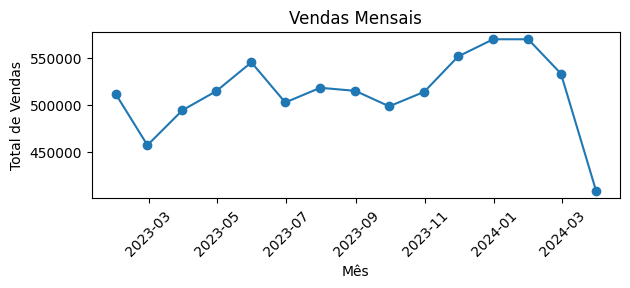

In [45]:
# Gráfico de Vendas Mensais
plt.subplot(2, 1, 1)
plt.plot(vendas_mensais.index, vendas_mensais.values, marker='o', linestyle='-')
plt.title('Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
# Agrupar por trimestre e calcular a soma das vendas
vendas_trimestrais = df_concatenados.resample('Q', on='Date')['Total_Vendas'].sum()

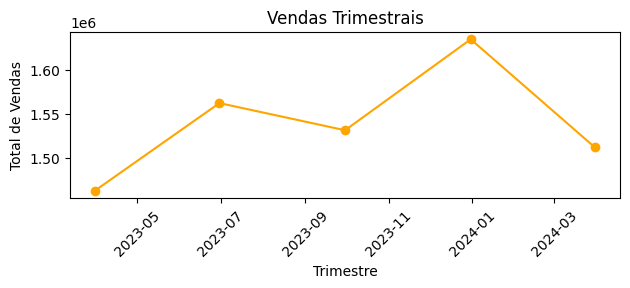

In [47]:
# Gráfico de Vendas Trimestrais
plt.subplot(2, 1, 2)
plt.plot(vendas_trimestrais.index, vendas_trimestrais.values, marker='o', color='orange', linestyle='-')
plt.title('Vendas Trimestrais')
plt.xlabel('Trimestre')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

A receita total por categoria

In [48]:
df_limpo['Total_Vendas'] = df_limpo['Quantity'] * df_limpo['Price']

In [50]:
# Agrupar os dados por categoria e somar as vendas totais
categoria_vendas = df_limpo.groupby('Category')['Total_Vendas'].sum().sort_values(ascending=False)

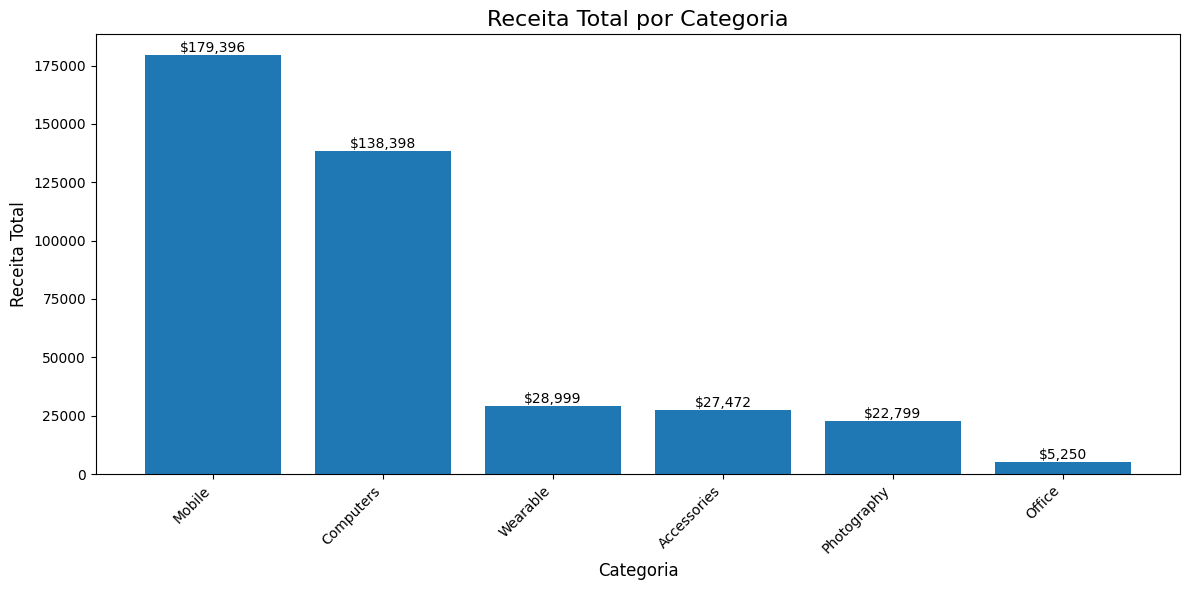

In [51]:
# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(categoria_vendas.index, categoria_vendas.values)
# Personalizar o gráfico
plt.title('Receita Total por Categoria', fontsize=16)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Receita Total', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adicionar rótulos de valor no topo de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom', rotation=0)

# Ajustar o layout
plt.tight_layout()
plt.show()

A quantidade de vendas por produto

In [52]:
# Agrupar os dados por produto e somar as quantidades
produto_vendas = df_limpo.groupby('Product')['Quantity'].sum().sort_values(ascending=False)

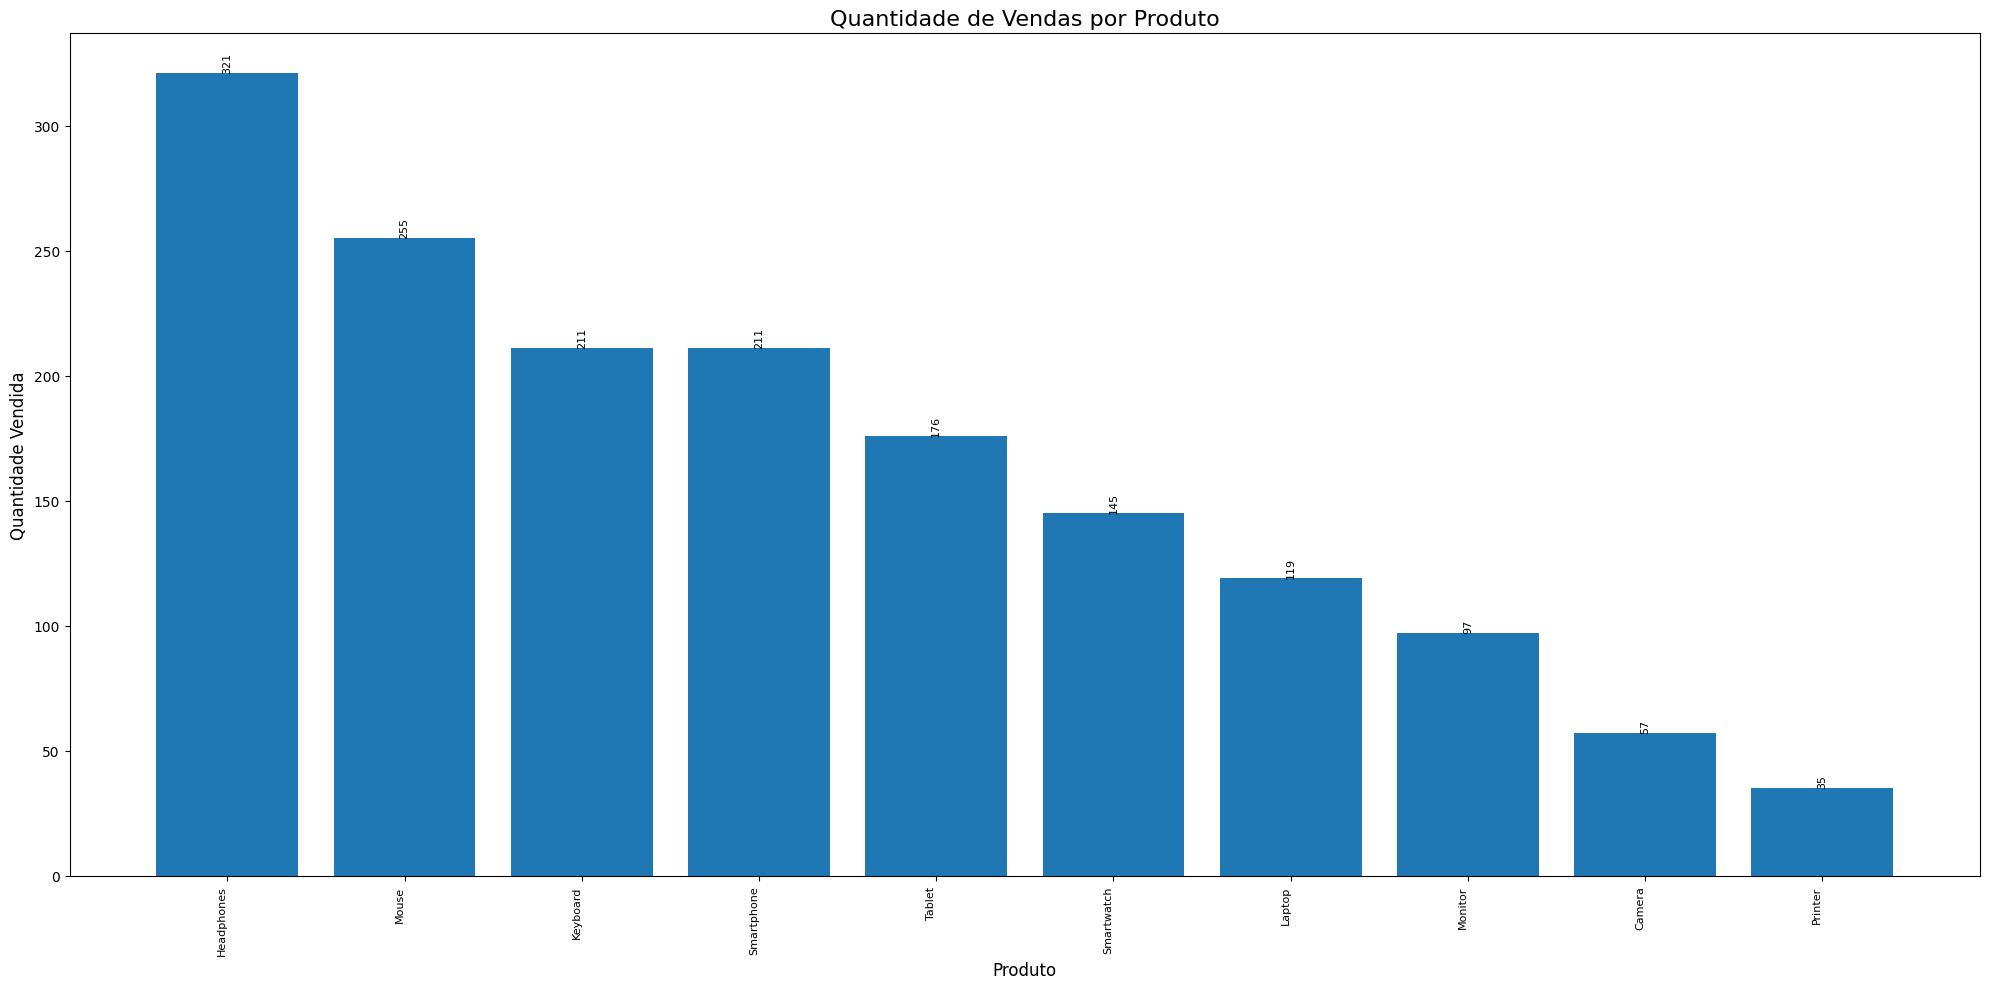

In [53]:
# Criar o gráfico de barras
plt.figure(figsize=(20, 10))  # Aumentei o tamanho da figura para acomodar mais produtos
bars = plt.bar(produto_vendas.index, produto_vendas.values)

# Personalizar o gráfico
plt.title('Quantidade de Vendas por Produto', fontsize=16)
plt.xlabel('Produto', fontsize=12)
plt.ylabel('Quantidade Vendida', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=8)  # Rotação aumentada para 90 graus e fonte menor

# Adicionar rótulos de valor no topo de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.0f}',
             ha='center', va='bottom', rotation=90, fontsize=8)  # Rotação e fonte dos rótulos ajustadas

# Ajustar o layout
plt.tight_layout()
plt.show()

Insights

In [54]:
#Mais alguns dados para uma visão mais ampla dos Insights
produto_maior_valor_vendas = df_limpo.groupby('Product')['Price'].sum().sort_values(ascending=False)
produto_maior_valor_vendas

Product
Laptop        21999.78
Smartphone    13199.78
Camera         8799.78
Tablet         6599.78
Monitor        4399.78
Smartwatch     4399.78
Printer        3299.78
Headphones     1099.78
Keyboard        659.78
Mouse           439.78
Name: Price, dtype: float64

# Insights de Vendas

## 1. Expansão de Produtos Populares (Headphones)
- **Insight**: O alto volume de vendas dos headphones indica uma forte demanda. Expandir a linha com novos modelos e preços pode capturar diferentes segmentos de clientes.
- **Ação**: Introduza modelos premium e econômicos para aumentar as opções e potencializar as vendas cruzadas com outros produtos eletrônicos.

---

## 2. Revisão de Produtos de Baixo Desempenho (Printers)
- **Insight**: Impressoras têm baixo volume de vendas e podem não ser relevantes para o portfólio.
- **Ação**: Avalie descontinuar as impressoras ou focar em nichos específicos, como modelos especializados que complementem outros produtos mais populares.

---

## 3. Estratégia de Vendas Cruzadas e Upselling
- **Insight**: Produtos complementares, como smartphones e laptops, podem ser vendidos junto com headphones para aumentar o ticket médio.
- **Ação**: Ofereça pacotes com descontos que combinem headphones e dispositivos de maior valor, incentivando vendas cruzadas.

---

## 4. Otimização de Estoque
- **Insight**: O estoque de headphones deve ser ajustado para refletir a alta demanda, enquanto o estoque de impressoras pode ser reduzido.
- **Ação**: Implementar um sistema de reabastecimento automático para headphones e reduzir o estoque de impressoras para evitar sobrecarga.

---

## 5. Análise de Margens de Lucro
- **Insight**: Produtos como headphones vendem em grande volume, mas com menor valor unitário, enquanto laptops e smartphones podem ter margens maiores.
- **Ação**: Avalie a margem de lucro dos headphones e explore oportunidades de aumento, como a venda de acessórios complementares.

---

## 6. Campanhas Focadas em Produtos de Alto Valor
- **Insight**: Laptops e smartphones geram grande parte da receita, sugerindo que devem ser o foco das campanhas de marketing.
- **Ação**: Invista em campanhas que promovam esses produtos de alto valor e explore estratégias de upselling com acessórios e serviços adicionais.

---

## 7. Destaque para Produtos Complementares
- **Insight**: Headphones, mouses e teclados são complementares a dispositivos de maior valor, como laptops e desktops.
- **Ação**: Crie pacotes promocionais ou descontos que incentivem a compra conjunta desses produtos, aumentando o valor médio das compras.

---

## 8. Ajuste de Precificação em Produtos de Baixo Valor
- **Insight**: Produtos como headphones têm um volume alto de vendas, e pequenos ajustes no preço podem ter um impacto significativo na receita.
- **Ação**: Considere aumentar ligeiramente o preço dos headphones e outros acessórios de baixo valor para maximizar o lucro.

---

## 9. Análise Sazonal de Vendas
- **Insight**: Pode haver tendências sazonais em vendas, especialmente em produtos eletrônicos populares como headphones.
- **Ação**: Monitore as flutuações sazonais e ajuste suas

---

## 10. Expansão do Segmento de Câmeras
- **Insight**: As câmeras apresentam boas vendas, sugerindo que há espaço para expansão ou exploração de novos modelos.
- **Ação**: Explore novos modelos ou pacotes de câmeras com acessórios para aumentar a receita desse segmento.
